$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Deep \space Learning $$
$$ Lab \space no. \space 5 $$

# `01` Assignment 01

- Design your LSTM learning model to classify hand-written digits (MNIST dataset).
- To handle images as a sequence, the LSTM input can be seen as a 28 sequences
of 28 elements each (taking each row of pixels as a single time step input).
- Then, you can use dense layer(s) on top (connected to the
output of the LSTM).
- Important Notes:
  - Image Size: $28\times28$
  - Use $80\%$ of the provided training data for training and $20\%$ for validation (Keep the test data for testing after training).
  - Use $32$ units in the LSTM layer and $15\%$ recurrent dropout.
  - Use Categorical Cross Entropy for the loss calculation, `Adam` for optimization and `accuracy` for metrics.


  **Additional Requirements**:
  - Try adding a second LSTM layer before the dense layer(s).
  - Change the number of cells to $48, 96, 256$ and report the accuracy curve.

## `+` Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, ConvLSTM2D, Activation, MaxPooling2D, AveragePooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping

# `+` Seed Value

In [ ]:
SEED = 907

## `+` Load & Preprocess MNIST Dataset

**Reminder:** You might need rescaling, and/or other preprocessing methods.

In [ ]:
(X_train, y_train), (X_test, y_test) =mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


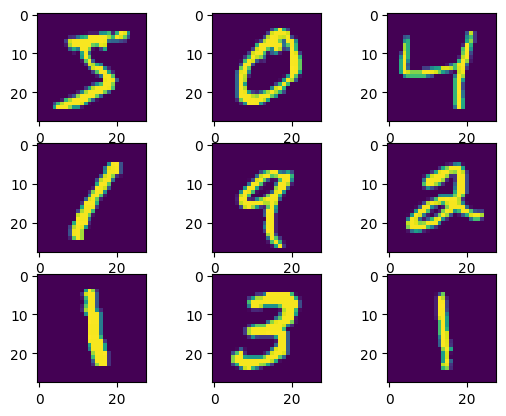

In [ ]:
fig, axes = plt.subplots(3,3)
axes = axes.flatten()
for i in range(9):
    axes[i].imshow(X_train[i])

plt.show()

In [ ]:
# Rescale Input
X_train =X_train / 255.0
X_test  =X_test / 255.0

In [ ]:
y_train =to_categorical(y_train, 10)
y_test  =to_categorical(y_test, 10)

## `+` Set Global Parameters

In [ ]:
BATCH_SIZE  =64
EPOCHS      =10

## `i` Model Design

In [ ]:
model = Sequential()
model.add(LSTM(32, input_shape=(28, 28), return_sequences=False))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

## `ii` Model Compilation & Training

In [ ]:
#early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
  X_train, y_train,
  epochs=EPOCHS,
  batch_size=BATCH_SIZE,
  validation_data=(X_test, y_test)
  #callbacks=[early_stop],
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5840 - loss: 1.2762 - val_accuracy: 0.8966 - val_loss: 0.3530
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9082 - loss: 0.3115 - val_accuracy: 0.9279 - val_loss: 0.2379
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9422 - loss: 0.2022 - val_accuracy: 0.9504 - val_loss: 0.1633
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9539 - loss: 0.1556 - val_accuracy: 0.9613 - val_loss: 0.1280
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9615 - loss: 0.1274 - val_accuracy: 0.9657 - val_loss: 0.1160
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9677 - loss: 0.1077 - val_accuracy: 0.9694 - val_loss: 0.1020
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9728 - loss: 0.0952 - val_accuracy: 0.9714 - val_loss: 0.0973
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.9745 - loss: 0.0844 - 

## `iii` Model Evaluation

In [ ]:
#model eveluation

loss_train, accuracy_train = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9819 - loss: 0.0621
Accuracy for training: 98.2083%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9742 - loss: 0.0861
Accuracy for testing: 97.8200%


## `iv` Result Visualization

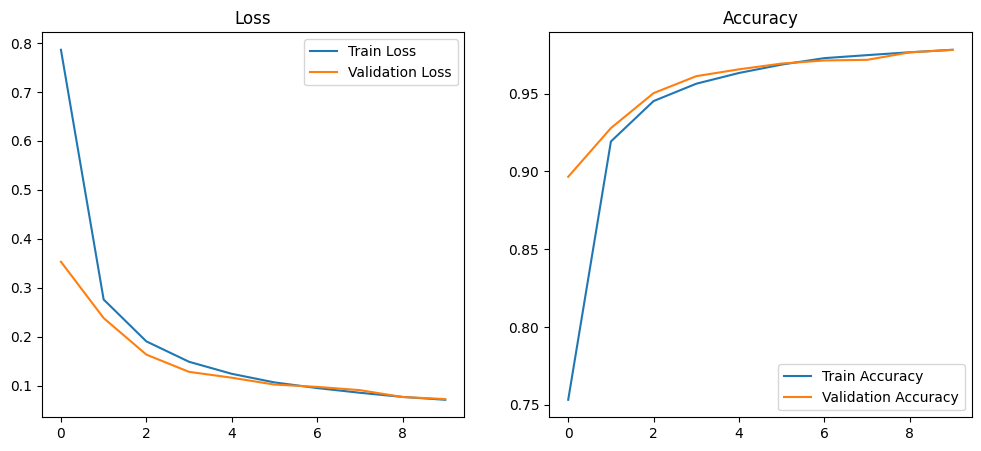

In [ ]:
# Plot the training and validation accuracy and loss
# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

## `v` Let's Visualize Model Predictions

Let's try to predict the class of some test samples and plot the results.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


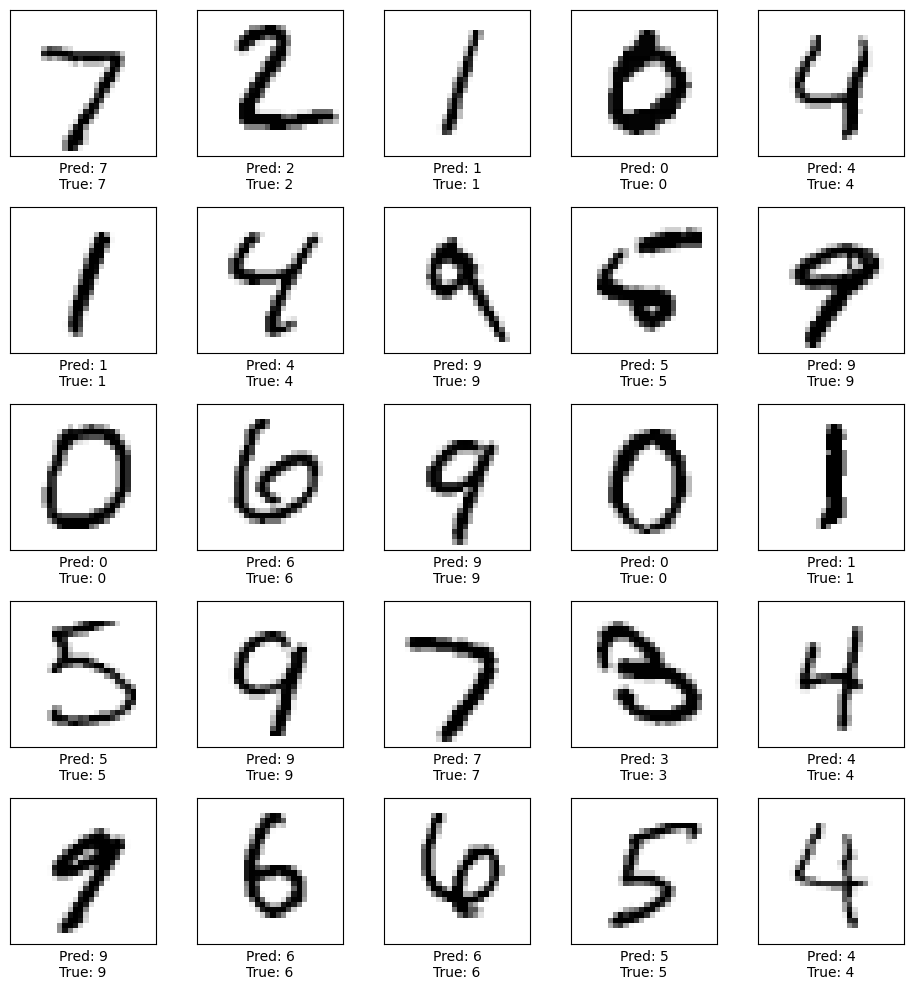

In [ ]:
from re import X
# Plot the Input, True Label, and Predicted Label
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"Pred: {y_pred_classes[i]}\nTrue: {y_true[i]}")
    plt.tight_layout()
plt.show()

**Note:** You can add more trials and explore different hyperparameters and design decisions as you want.

------------------------------

# Assignment 02
- Repeat assignment `01` using `ConvLSTM1D` layer instead of `LSTM`: An LSTM utilizing the power of convolutions. Read more [here](https://paperswithcode.com/method/convlstm) and [here](https://medium.com/neuronio/an-introduction-to-convlstm-55c9025563a7).
- Use the same parameters from assignment `01` in addition to:
  - Kernel Size -> Try $1$ and $3$. Which is better?
  - Padding = `same` or `valid` -> Is there a big difference?

**Note:** You might need to reshape the input (Hint: check `keras.layers.Reshape` layer)


IMPORTANT NOTE: Make sure to organize your solution, add proper documentation, and report your insights.
------------------------------

In [ ]:
#Resshape
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
# Reshape to include the time dimension
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28, 1)

# Now the input_shape in your ConvLSTM2D layer should match this shape
model = Sequential()
model.add(ConvLSTM2D(32, (1, 1), input_shape=(1, 28, 28, 1), return_sequences=False))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test)
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 139s 145ms/step - accuracy: 0.7827 - loss: 0.9350 - val_accuracy: 0.9206 - val_loss: 0.2747
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 144ms/step - accuracy: 0.9207 - loss: 0.2719 - val_accuracy: 0.9264 - val_loss: 0.2521
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 131s 140ms/step - accuracy: 0.9269 - loss: 0.2521 - val_accuracy: 0.9315 - val_loss: 0.2397
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 134s 143ms/step - accuracy: 0.9307 - loss: 0.2385 - val_accuracy: 0.9317 - val_loss: 0.2336
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 143ms/step - accuracy: 0.9353 - loss: 0.2221 - val_accuracy: 0.9329 - val_loss: 0.2325
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 131s 140ms/step - accuracy: 0.9363 - loss: 0.2244 - val_accuracy: 0.9338 - val_loss: 0.2315
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 127s 135ms/step - accuracy: 0.9363 - loss: 0.2235 - val_accuracy: 0.9341 - val_loss: 0.2316
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 154s 148ms/step - accuracy: 0.9324 -

In [ ]:
loss_train, accuracy_train = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 23ms/step - accuracy: 0.9392 - loss: 0.2125
Accuracy for training: 93.7583%
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.9250 - loss: 0.2626
Accuracy for testing: 93.3600%


In [ ]:
# Reshape to include the time dimension
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28, 1)

# Now the input_shape in your ConvLSTM2D layer should match this shape
model = Sequential()
model.add(ConvLSTM2D(32, (1, 1), input_shape=(1, 28, 28, 1), return_sequences=False))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.7854 - loss: 0.9335 - val_accuracy: 0.9231 - val_loss: 0.2725
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.9200 - loss: 0.2809 - val_accuracy: 0.9302 - val_loss: 0.2459
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9287 - loss: 0.2482 - val_accuracy: 0.9310 - val_loss: 0.2372
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9315 - loss: 0.2345 - val_accuracy: 0.9335 - val_loss: 0.2329
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9316 - loss: 0.2340 - val_accuracy: 0.9318 - val_loss: 0.2332
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9354 - loss: 0.2263 - val_accuracy: 0.9336 - val_loss: 0.2316
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9358 - loss: 0.2214 - val_accuracy: 0.9318 - val_loss: 0.2304
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9354 - loss: 0.2294 - val_accurac

In [ ]:
loss_train, accuracy_train = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9377 - loss: 0.2176
Accuracy for training: 93.7133%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9241 - loss: 0.2596
Accuracy for testing: 93.2800%


In [ ]:
# Reshape to include the time dimension
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28, 1)

# Now the input_shape in your ConvLSTM2D layer should match this shape
model = Sequential()
model.add(ConvLSTM2D(32, (3,3), input_shape=(1, 28, 28, 1), return_sequences=False))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8182 - loss: 0.6881 - val_accuracy: 0.9317 - val_loss: 0.2397
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.9373 - loss: 0.2237 - val_accuracy: 0.9571 - val_loss: 0.1557
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9589 - loss: 0.1475 - val_accuracy: 0.9678 - val_loss: 0.1101
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9696 - loss: 0.1074 - val_accuracy: 0.9748 - val_loss: 0.0839
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9754 - loss: 0.0863 - val_accuracy: 0.9777 - val_loss: 0.0740
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9800 - loss: 0.0724 - val_accuracy: 0.9787 - val_loss: 0.0665
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9820 - loss: 0.0618 - val_accuracy: 0.9813 - val_loss: 0.0652
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9842 - loss: 0.0535 - val_accurac

In [ ]:
loss_train, accuracy_train = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9882 - loss: 0.0405
Accuracy for training: 98.8750%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9777 - loss: 0.0688
Accuracy for testing: 98.2000%


In [ ]:
# Reshape to include the time dimension
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28, 1)

# Now the input_shape in your ConvLSTM2D layer should match this shape
model = Sequential()
model.add(ConvLSTM2D(32, (3,3), input_shape=(1, 28, 28, 1), return_sequences=False))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8207 - loss: 0.6895 - val_accuracy: 0.9496 - val_loss: 0.1747
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9551 - loss: 0.1566 - val_accuracy: 0.9696 - val_loss: 0.1085
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9720 - loss: 0.0990 - val_accuracy: 0.9764 - val_loss: 0.0803
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9790 - loss: 0.0750 - val_accuracy: 0.9776 - val_loss: 0.0682
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9820 - loss: 0.0631 - val_accuracy: 0.9799 - val_loss: 0.0634
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9840 - loss: 0.0560 - val_accuracy: 0.9791 - val_loss: 0.0629
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9861 - loss: 0.0483 - val_accuracy: 0.9797 - val_loss: 0.0585
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9873 - loss: 0.0462 - val_accura

In [ ]:
loss_train, accuracy_train = model.evaluate(X_train, y_train)
print(f"Accuracy for training: {accuracy_train:.4%}")

loss_test, accuracy_test = model.evaluate(X_test, y_test)
print(f"Accuracy for testing: {accuracy_test:.4%}")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9915 - loss: 0.0322
Accuracy for training: 99.1650%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9804 - loss: 0.0638
Accuracy for testing: 98.3200%


#insights:

- best model: kernal=3,padding=same,accuracey=`99.1%`=>train,`98.3%`=>test
- When using padding = valid,accuracy `98%` on train, `97%` on test.
- when using kernal = 1, it gives `93%` on train, `92%` on test even if padding `'same'` or `'valid'` used.


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$